# Fase 1: Exploración y limpieza de datos

## 1. Cargar las librerías necesarias y datasets

In [1]:
import pandas as pd #para manejar dataframes
import numpy as np #para operaciones numéricas
import matplotlib.pyplot as plt #para visualización
import seaborn as sns #para visualización avanzada

# Cargar datasets
flight_path = "data/Customer Flight Activity.csv"
loyalty_path = "data/Customer Loyalty History.csv"

df_flights = pd.read_csv(flight_path)
df_loyalty = pd.read_csv(loyalty_path)
print("Datasets cargados exitosamente.")

Datasets cargados exitosamente.


## 2. Exploración inicial de los datos: estructura y tipos

In [2]:
df_flights.head()

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0
2,100140,2017,1,6,0,6,1200,120.0,0,0
3,100214,2017,1,0,0,0,0,0.0,0,0
4,100272,2017,1,0,0,0,0,0.0,0,0


In [3]:
df_flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               405624 non-null  int64  
 1   Year                         405624 non-null  int64  
 2   Month                        405624 non-null  int64  
 3   Flights Booked               405624 non-null  int64  
 4   Flights with Companions      405624 non-null  int64  
 5   Total Flights                405624 non-null  int64  
 6   Distance                     405624 non-null  int64  
 7   Points Accumulated           405624 non-null  float64
 8   Points Redeemed              405624 non-null  int64  
 9   Dollar Cost Points Redeemed  405624 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 30.9 MB


In [4]:
df_flights.describe().round(2)

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
count,405624.00,405624.0,405624.00,405624.00,405624.00,405624.00,405624.00,405624.00,405624.00,405624.00
mean,550037.87,2017.5,6.50,4.12,1.03,5.15,1208.88,123.69,30.70,2.48
std,258935.29,0.5,3.45,5.23,2.08,6.52,1433.16,146.60,125.49,10.15
min,100018.00,2017.0,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,326961.00,2017.0,3.75,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,550834.00,2017.5,6.50,1.00,0.00,1.00,488.00,50.00,0.00,0.00
75%,772194.00,2018.0,9.25,8.00,1.00,10.00,2336.00,239.00,0.00,0.00
max,999986.00,2018.0,12.00,21.00,11.00,32.00,6293.00,676.50,876.00,71.00


In [5]:
df_loyalty.head()

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0
3,608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013,2,NaN,NaN
4,530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,10,NaN,NaN


In [6]:
df_loyalty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loyalty Number      16737 non-null  int64  
 1   Country             16737 non-null  object 
 2   Province            16737 non-null  object 
 3   City                16737 non-null  object 
 4   Postal Code         16737 non-null  object 
 5   Gender              16737 non-null  object 
 6   Education           16737 non-null  object 
 7   Salary              12499 non-null  float64
 8   Marital Status      16737 non-null  object 
 9   Loyalty Card        16737 non-null  object 
 10  CLV                 16737 non-null  float64
 11  Enrollment Type     16737 non-null  object 
 12  Enrollment Year     16737 non-null  int64  
 13  Enrollment Month    16737 non-null  int64  
 14  Cancellation Year   2067 non-null   float64
 15  Cancellation Month  2067 non-null   float64
dtypes: f

In [7]:
df_loyalty.describe().round(2)

,Loyalty Number,Salary,CLV,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
count,16737.00,12499.00,16737.00,16737.00,16737.00,2067.00,2067.00
mean,549735.88,79245.61,7988.90,2015.25,6.67,2016.50,6.96
std,258912.13,35008.30,6860.98,1.98,3.40,1.38,3.46
min,100018.00,-58486.00,1898.01,2012.00,1.00,2013.00,1.00
25%,326603.00,59246.50,3980.84,2014.00,4.00,2016.00,4.00
50%,550434.00,73455.00,5780.18,2015.00,7.00,2017.00,7.00
75%,772019.00,88517.50,8940.58,2017.00,10.00,2018.00,10.00
max,999986.00,407228.00,83325.38,2018.00,12.00,2018.00,12.00


## 3. Búsqueda de nulos y valores atípicos

In [8]:
df_flights.isna().sum()
df_loyalty.isna().sum()

Loyalty Number            0
Country                   0
Province                  0
City                      0
Postal Code               0
Gender                    0
Education                 0
Salary                 4238
Marital Status            0
Loyalty Card              0
CLV                       0
Enrollment Type           0
Enrollment Year           0
Enrollment Month          0
Cancellation Year     14670
Cancellation Month    14670
dtype: int64

In [9]:
df_flights.isna().mean() * 100
df_loyalty.isna().mean() * 100
#Con porcentajes

Loyalty Number         0.000000
Country                0.000000
Province               0.000000
City                   0.000000
Postal Code            0.000000
Gender                 0.000000
Education              0.000000
Salary                25.321145
Marital Status         0.000000
Loyalty Card           0.000000
CLV                    0.000000
Enrollment Type        0.000000
Enrollment Year        0.000000
Enrollment Month       0.000000
Cancellation Year     87.650117
Cancellation Month    87.650117
dtype: float64

## 4. Chequear duplicados

In [10]:
df_flights.duplicated().sum()
df_loyalty.duplicated().sum()


np.int64(0)

## 5. Unir los datasets

In [11]:
df = pd.merge(
    df_flights,
    df_loyalty,
    on="Loyalty Number",
    how="left"
)
print("Datasets unidos exitosamente.")
df.head()

Datasets unidos exitosamente.


,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,...,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,100018,2017,1,3,0,3,1521,152.0,0,0,...,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8,NaN,NaN
1,100102,2017,1,10,4,14,2030,203.0,0,0,...,College,NaN,Single,Nova,2887.74,Standard,2013,3,NaN,NaN
2,100140,2017,1,6,0,6,1200,120.0,0,0,...,College,NaN,Divorced,Nova,2838.07,Standard,2016,7,NaN,NaN
3,100214,2017,1,0,0,0,0,0.0,0,0,...,Bachelor,63253.0,Married,Star,4170.57,Standard,2015,8,NaN,NaN
4,100272,2017,1,0,0,0,0,0.0,0,0,...,Bachelor,91163.0,Divorced,Star,6622.05,Standard,2014,1,NaN,NaN


In [13]:
# un left para mantener todas las observaciones de actividad de vuelo y añadirle la información de perfil del cliente

In [12]:
#comprobar los nulos una vez unidos, siguen siendo los mismos
df.info()
df.isna().sum()
df.isna().mean() * 100

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 25 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               405624 non-null  int64  
 1   Year                         405624 non-null  int64  
 2   Month                        405624 non-null  int64  
 3   Flights Booked               405624 non-null  int64  
 4   Flights with Companions      405624 non-null  int64  
 5   Total Flights                405624 non-null  int64  
 6   Distance                     405624 non-null  int64  
 7   Points Accumulated           405624 non-null  float64
 8   Points Redeemed              405624 non-null  int64  
 9   Dollar Cost Points Redeemed  405624 non-null  int64  
 10  Country                      405624 non-null  object 
 11  Province                     405624 non-null  object 
 12  City                         405624 non-null  object 
 13 

Loyalty Number                  0.000000
Year                            0.000000
Month                           0.000000
Flights Booked                  0.000000
Flights with Companions         0.000000
Total Flights                   0.000000
Distance                        0.000000
Points Accumulated              0.000000
Points Redeemed                 0.000000
Dollar Cost Points Redeemed     0.000000
Country                         0.000000
Province                        0.000000
City                            0.000000
Postal Code                     0.000000
Gender                          0.000000
Education                       0.000000
Salary                         25.312112
Marital Status                  0.000000
Loyalty Card                    0.000000
CLV                             0.000000
Enrollment Type                 0.000000
Enrollment Year                 0.000000
Enrollment Month                0.000000
Cancellation Year              87.657535
Cancellation Mon

## 6. Ajuste de datos 

### 1. Eliminación o imputación de nulos

In [13]:
# 1. Imputar nulos por media de Education (solo donde hay datos en cada grupo)
salary_means = df.groupby("Education")["Salary"].transform("mean")
df["Salary"] = df["Salary"].fillna(salary_means)

# 2. Luego, si aún hay nulos (por ejemplo College), imputar con media global
global_mean = df["Salary"].mean()
df.loc[df["Salary"].isna(), "Salary"] = global_mean

# 3. Comprobar
df["Salary"].isna().sum()
df.groupby("Education")["Salary"].mean().round(2)


Education
Bachelor                 72476.21
College                  79268.83
Doctor                  178335.44
High School or Below     60986.54
Master                  103767.49
Name: Salary, dtype: float64

In [14]:
df.info() #compruebo que ya no estan los nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 25 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               405624 non-null  int64  
 1   Year                         405624 non-null  int64  
 2   Month                        405624 non-null  int64  
 3   Flights Booked               405624 non-null  int64  
 4   Flights with Companions      405624 non-null  int64  
 5   Total Flights                405624 non-null  int64  
 6   Distance                     405624 non-null  int64  
 7   Points Accumulated           405624 non-null  float64
 8   Points Redeemed              405624 non-null  int64  
 9   Dollar Cost Points Redeemed  405624 non-null  int64  
 10  Country                      405624 non-null  object 
 11  Province                     405624 non-null  object 
 12  City                         405624 non-null  object 
 13 

In [22]:
#no borro los nulos que no son relevantes o que son lógicos en mi dataset

  ### 2. Transformación de variables y columnas 

In [15]:
# 1. Convertir columnas temporales a enteros
df["Year"] = df["Year"].astype("int64")
df["Month"] = df["Month"].astype("int64")

In [16]:
# 2. Crear columna de fecha completa
df["Date"] = pd.to_datetime(
    df["Year"].astype(str) + "-" + df["Month"].astype(str) + "-01"
)

In [17]:
# 3. Columnas categóricas a tipo 'category' 
cat_cols = ["gender", "education", "marital status", "loyalty card", 
            "country", "province", "city"]
for col in cat_cols:
    if col in df.columns:
        df[col] = df[col].astype("category")

In [18]:
# 4. Corregir salarios negativos
df["Salary"] = df["Salary"].abs()  # Valor absoluto, en lugar de eliminar filas

In [19]:
# 5. Estandarizar nombres de columnas (minúsculas)
df_flights.columns = df_flights.columns.str.lower()
df_loyalty.columns = df_loyalty.columns.str.lower()

# Verificar
print("Columnas flights:", df_flights.columns.tolist())
print("Columnas loyalty:", df_loyalty.columns.tolist())


Columnas flights: ['loyalty number', 'year', 'month', 'flights booked', 'flights with companions', 'total flights', 'distance', 'points accumulated', 'points redeemed', 'dollar cost points redeemed']
Columnas loyalty: ['loyalty number', 'country', 'province', 'city', 'postal code', 'gender', 'education', 'salary', 'marital status', 'loyalty card', 'clv', 'enrollment type', 'enrollment year', 'enrollment month', 'cancellation year', 'cancellation month']


Verificación de que se ha aplicado correctamente la transformación

In [20]:
df.columns = df.columns.str.lower()
# Verificar
print("Columnas df:", df.columns.tolist())

Columnas df: ['loyalty number', 'year', 'month', 'flights booked', 'flights with companions', 'total flights', 'distance', 'points accumulated', 'points redeemed', 'dollar cost points redeemed', 'country', 'province', 'city', 'postal code', 'gender', 'education', 'salary', 'marital status', 'loyalty card', 'clv', 'enrollment type', 'enrollment year', 'enrollment month', 'cancellation year', 'cancellation month', 'date']


In [21]:
# Verificar que todo está bien
print("Tipos de datos finales:")
print(df.dtypes)
print("\nSalary después de corrección:")
print(df["salary"].describe())
print("\nNulos restantes en Salary:", df["salary"].isna().sum())

Tipos de datos finales:
loyalty number                          int64
year                                    int64
month                                   int64
flights booked                          int64
flights with companions                 int64
total flights                           int64
distance                                int64
points accumulated                    float64
points redeemed                         int64
dollar cost points redeemed             int64
country                                object
province                               object
city                                   object
postal code                            object
gender                                 object
education                              object
salary                                float64
marital status                         object
loyalty card                           object
clv                                   float64
enrollment type                        object
enrollment

In [23]:
# Guardar datasets procesados 
df_flights.to_csv('customer_flight_activity_clean.csv', index=False)
df_loyalty.to_csv('customer_loyalty_history_clean.csv', index=False)
df.to_csv('df_merged_clean.csv', index=False)

print("✅ Guardados:")
print("- customer_flight_activity_clean.csv")
print("- customer_loyalty_history_clean.csv") 
print("- df_merged_clean.csv")


✅ Guardados:
- customer_flight_activity_clean.csv
- customer_loyalty_history_clean.csv
- df_merged_clean.csv


In [25]:
# En lugar de los originales, cargar los limpios
df_flights = pd.read_csv('customer_flight_activity_clean.csv')
df_loyalty = pd.read_csv('customer_loyalty_history_clean.csv')
df = pd.read_csv('df_merged_clean.csv')


# Fase 2: Análisis estadístico 

In [26]:
# Verificar datasets limpios
print("=== SHAPE ===")
print("Flight:", df_flights.shape)
print("Loyalty:", df_loyalty.shape)
print("Merged:", df.shape)

print("\n=== TIPOS DE DATOS (merged) ===")
print(df.dtypes)


=== SHAPE ===
Flight: (405624, 10)
Loyalty: (16737, 16)
Merged: (405624, 26)

=== TIPOS DE DATOS (merged) ===
loyalty number                   int64
year                             int64
month                            int64
flights booked                   int64
flights with companions          int64
total flights                    int64
distance                         int64
points accumulated             float64
points redeemed                  int64
dollar cost points redeemed      int64
country                         object
province                        object
city                            object
postal code                     object
gender                          object
education                       object
salary                         float64
marital status                  object
loyalty card                    object
clv                            float64
enrollment type                 object
enrollment year                  int64
enrollment month                

In [27]:
# Missing values por columna
print("=== MISSING VALUES (%) ===")
missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100
print(pd.DataFrame({'Missing': missing, '%': missing_pct}).round(2))


=== MISSING VALUES (%) ===
                             Missing      %
loyalty number                     0   0.00
year                               0   0.00
month                              0   0.00
flights booked                     0   0.00
flights with companions            0   0.00
total flights                      0   0.00
distance                           0   0.00
points accumulated                 0   0.00
points redeemed                    0   0.00
dollar cost points redeemed        0   0.00
country                            0   0.00
province                           0   0.00
city                               0   0.00
postal code                        0   0.00
gender                             0   0.00
education                          0   0.00
salary                             0   0.00
marital status                     0   0.00
loyalty card                       0   0.00
clv                                0   0.00
enrollment type                    0   0.00
enrol

Estos nulos son lógicos en nuestro análisis

## 1. Análisis de variables numéricas

### 1.1 Estadísticas descriptivas básicas

In [28]:
# Variables numéricas relevantes (negocio)
vars_numericas = ['total flights', 'distance', 'points accumulated', 'points redeemed', 
                  'dollar cost points redeemed', 'salary', 'clv']

print(" ESTADÍSTICAS DESCRIPTIVAS - VARIABLES NUMÉRICAS")
stats = df[vars_numericas].describe(include='all').round(2)
print(stats)

# Moda (valor más frecuente)
print(" MODA:")
for col in vars_numericas:
    moda = df[col].mode()
    print(f"{col}: {moda.iloc[0] if len(moda)>0 else 'No aplica'}")

 ESTADÍSTICAS DESCRIPTIVAS - VARIABLES NUMÉRICAS
       total flights   distance  points accumulated  points redeemed  \
count      405624.00  405624.00           405624.00        405624.00   
mean            5.15    1208.88              123.69            30.70   
std             6.52    1433.16              146.60           125.49   
min             0.00       0.00                0.00             0.00   
25%             0.00       0.00                0.00             0.00   
50%             1.00     488.00               50.00             0.00   
75%            10.00    2336.00              239.00             0.00   
max            32.00    6293.00              676.50           876.00   

       dollar cost points redeemed     salary        clv  
count                    405624.00  405624.00  405624.00  
mean                          2.48   79352.94    7991.98  
std                          10.15   30019.54    6863.66  
min                           0.00    9081.00    1898.01  
25%    

 **La mayoría de los clientes**, aproximadamente un 49%, no registraron vuelos en un mes específico
Esto refleja clientes infrecuentes, en este análisis se considera usar otra métrica como **mediana**, la cual son 5 vuelos al mes. 

### 1.2 Identificación de valores atípicos, outliers

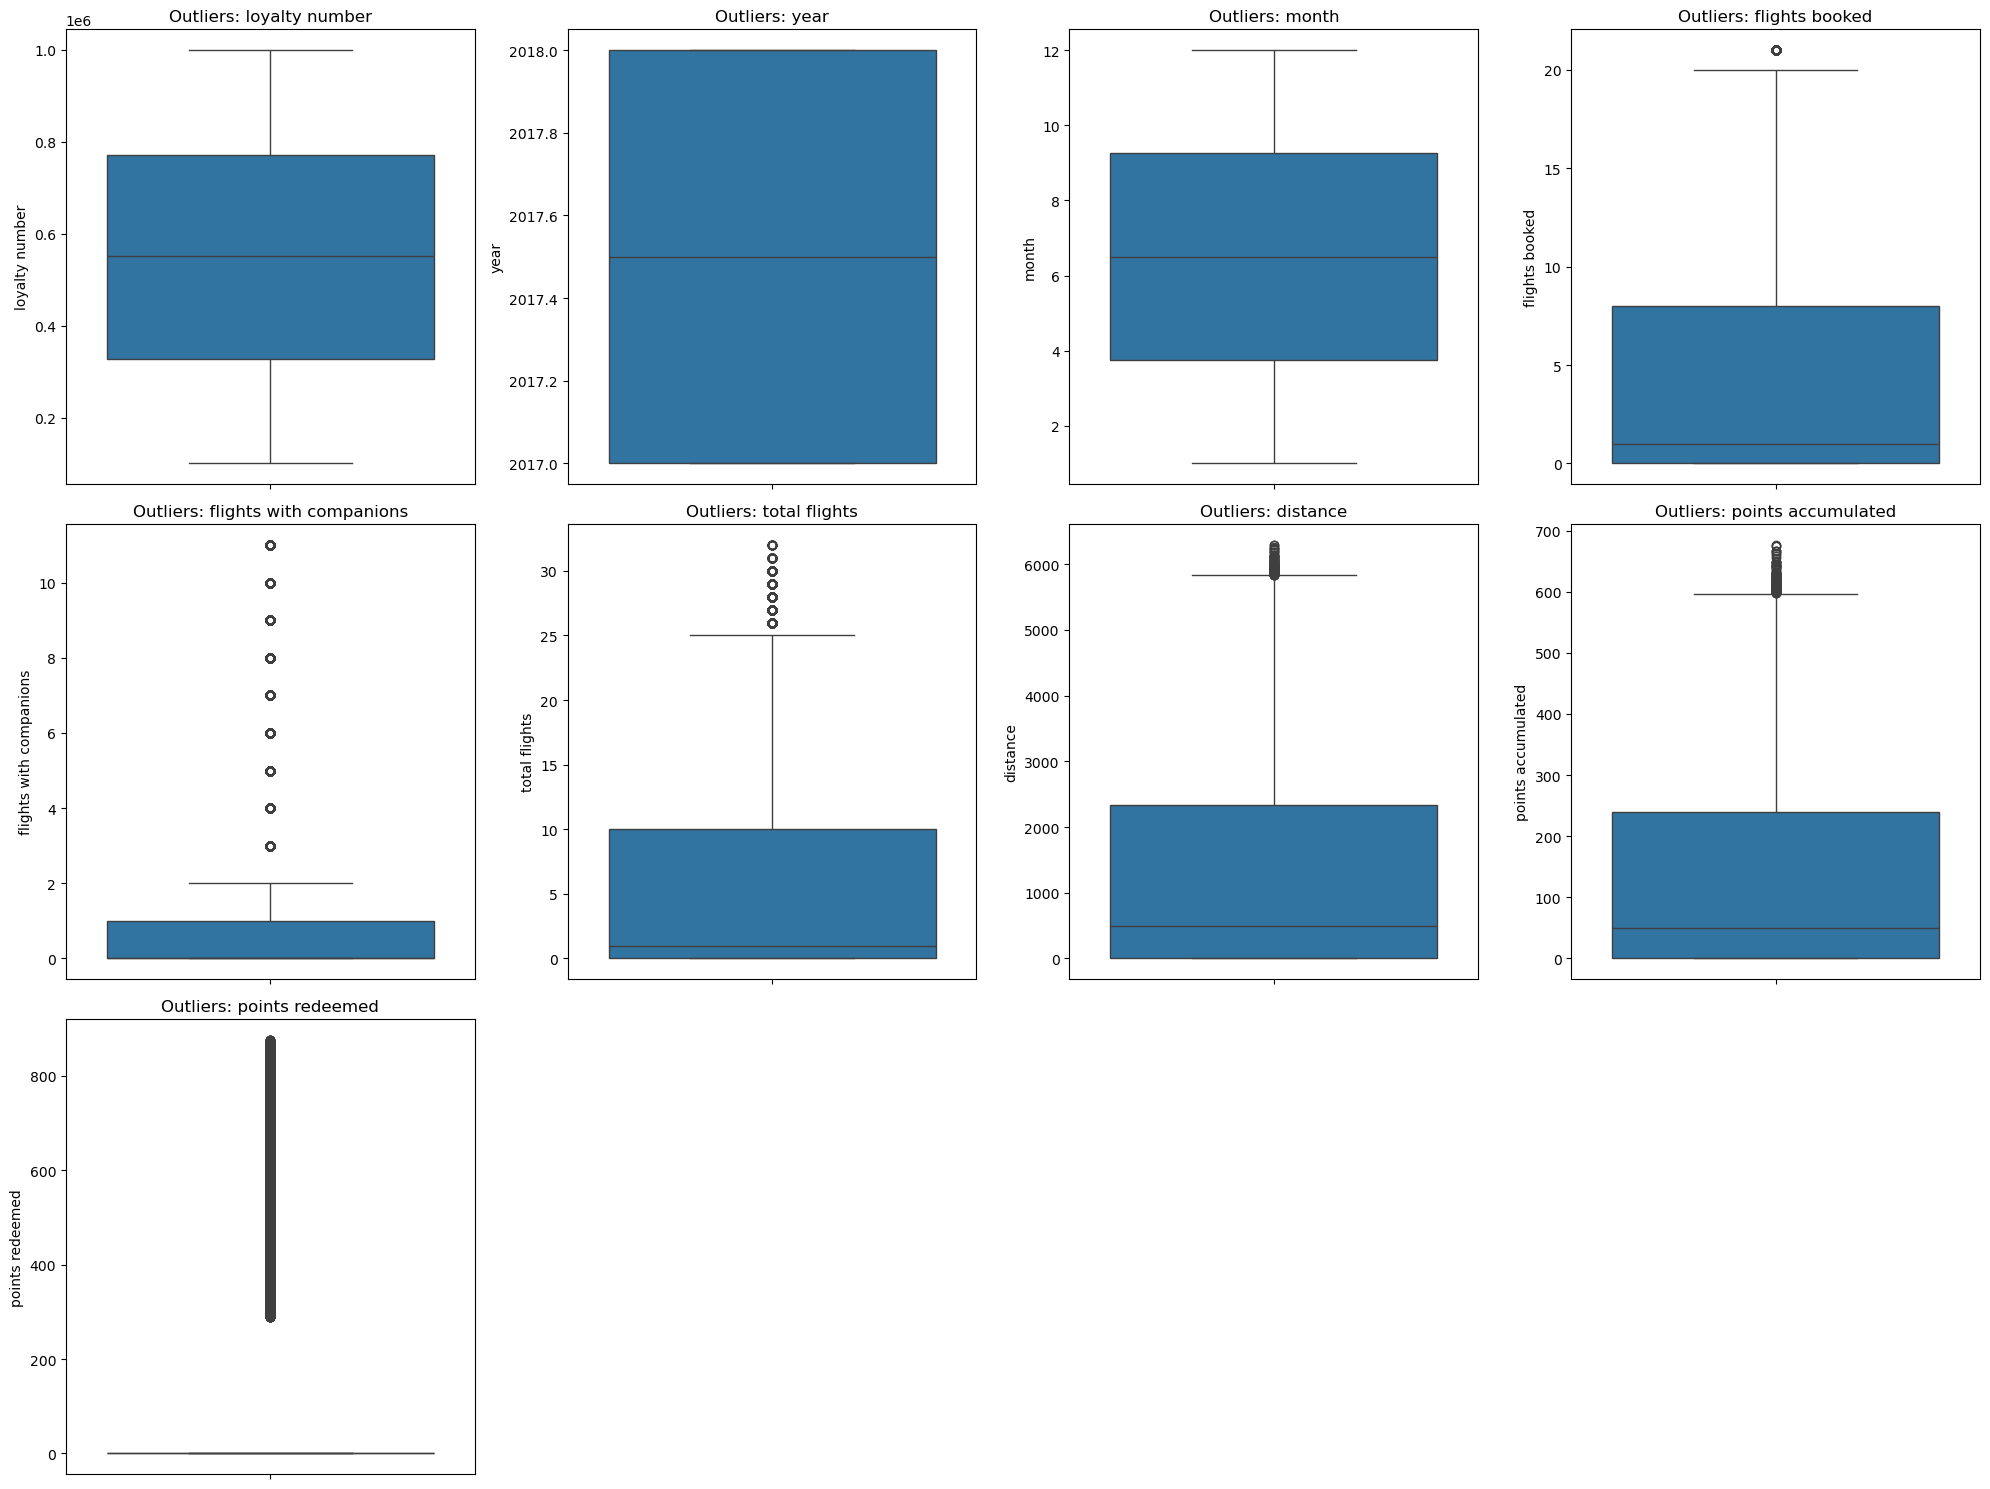

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize=(20, 15)) 
vars_outliers = ['loyalty number', 'year', 'month', 'flights booked', 'flights with companions', 
                 'total flights', 'distance', 'points accumulated', 'points redeemed', 
                 ]

for i, var in enumerate(vars_outliers, 1):
    plt.subplot(3, 4, i)  # 3 filas x 4 cols = 12 slots
    sns.boxplot(y=df[var].dropna())  # .dropna() evita NaNs
    plt.title(f'Outliers: {var}')
    plt.ylabel(var)  

plt.tight_layout()
plt.show()


In [30]:
import pandas as pd
import numpy as np

df = pd.read_csv('customer_flight_activity_clean.csv', low_memory=False)
vars_numericas = df.select_dtypes(include=['int64', 'float64']).columns.tolist()  # Automático

resultados = pd.DataFrame()
for col in vars_numericas:
    datos = df[col].dropna()
    Q1 = datos.quantile(0.25)
    Q3 = datos.quantile(0.75)
    IQR_ = Q3 - Q1
    lim_inf = Q1 - 1.5 * IQR_
    lim_sup = Q3 + 1.5 * IQR_
    n_out = len(df[(df[col] < lim_inf) | (df[col] > lim_sup)])
    temp = pd.DataFrame({
        'Columna': [col], 'Q1': [Q1], 'Q3': [Q3], 'IQR': [IQR_],
        'Lim_inf': [lim_inf], 'Lim_sup': [lim_sup],
        'N_outliers': [n_out], 'Porcentaje': [n_out / len(df) * 100]
    })
    resultados = pd.concat([resultados, temp], ignore_index=True)

print(resultados.round(2))
resultados.to_csv('outliers_todas_columnas.csv', index=False)


                       Columna         Q1         Q3       IQR   Lim_inf  \
0               loyalty number  326961.00  772194.00  445233.0 -340888.5   
1                         year    2017.00    2018.00       1.0    2015.5   
2                        month       3.75       9.25       5.5      -4.5   
3               flights booked       0.00       8.00       8.0     -12.0   
4      flights with companions       0.00       1.00       1.0      -1.5   
5                total flights       0.00      10.00      10.0     -15.0   
6                     distance       0.00    2336.00    2336.0   -3504.0   
7           points accumulated       0.00     239.00     239.0    -358.5   
8              points redeemed       0.00       0.00       0.0       0.0   
9  dollar cost points redeemed       0.00       0.00       0.0       0.0   

     Lim_sup  N_outliers  Porcentaje  
0  1440043.5           0        0.00  
1     2019.5           0        0.00  
2       17.5           0        0.00  
3      

### Interpretación de resultados
Los outliers destacados en nuestro análisis corresponden a valores extremos en las variables numéricas del dataset. 
 Los más significativos incluyen:
- **Flights with companions**: Valores extremadamente altos en esta variable sugieren que algunos clientes viajan con un número inusualmente grande de acompañantes, lo cual podría indicar patrones de viaje atípicos o errores en la captura de datos.
- **Points redeemed**: Valores elevados en esta variable indican que ciertos clientes están canjeando una cantidad desproporcionada de puntos, lo que podría reflejar un uso intensivo del programa de lealtad o posibles irregularidades.
- **Dollar cost points redeemed**: Valores altos en esta variable sugieren que algunos clientes están canjeando puntos por un valor monetario significativamente mayor.
- **El resto de variables** también presentan outliers, pero en menor medida, lo que indica que aunque existen valores extremos, no son tan pronunciados como en las variables mencionadas anteriormente, incluso existiendo algunas columnas con outliers mínimos o casi nulos.

### 1.3 Análisis de correlación entre variables numéricas

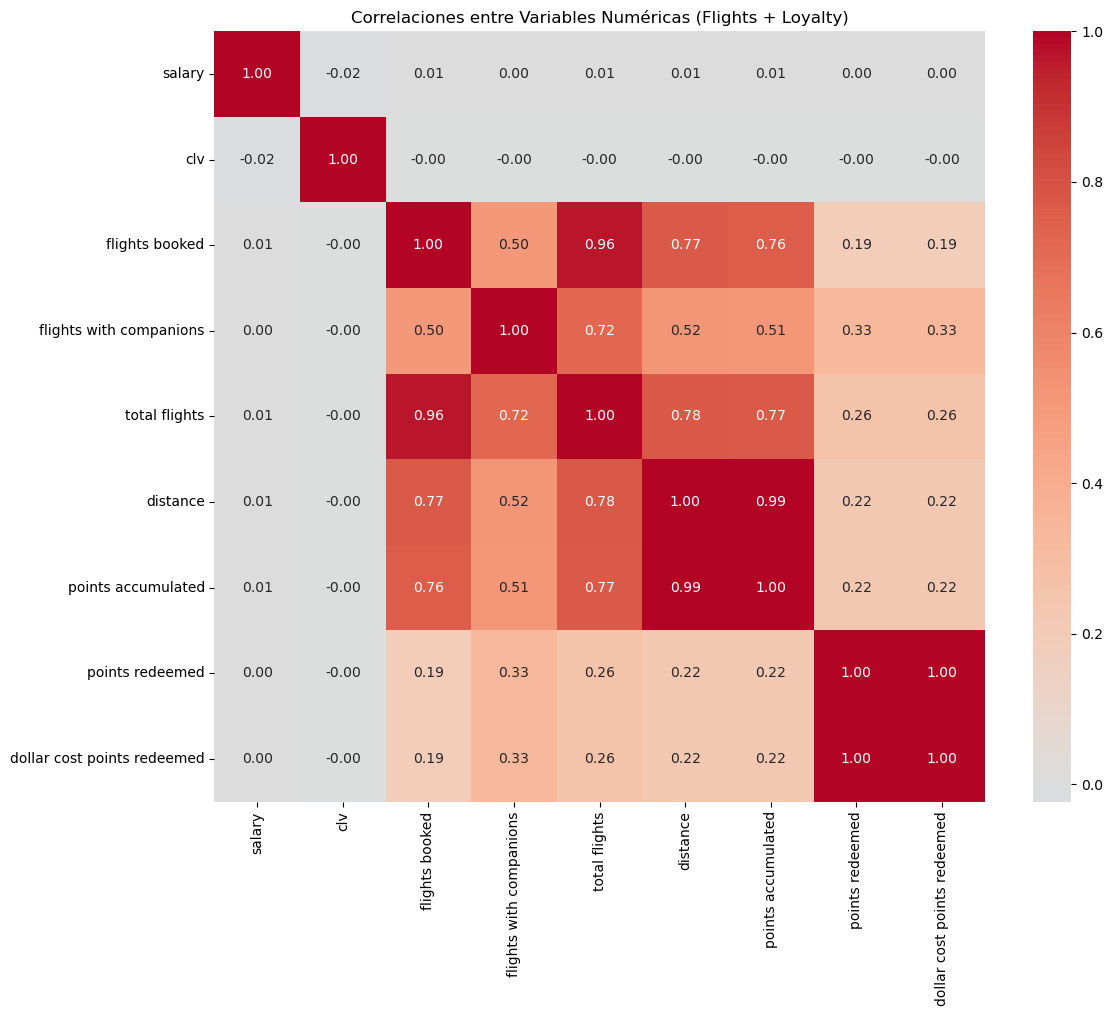

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar ambos datasets
df_flights = pd.read_csv('customer_flight_activity_clean.csv', low_memory=False)
df_loyalty = pd.read_csv('customer_loyalty_history_clean.csv')

# Merge por Loyalty Number 
df_merged = pd.merge(df_loyalty[['loyalty number', 'salary', 'clv']], 
                     df_flights, on='loyalty number', how='inner')

# Variables numéricas combinadas
vars_numericas = ['salary', 'clv', 'flights booked', 'flights with companions', 
                  'total flights', 'distance', 'points accumulated', 
                  'points redeemed', 'dollar cost points redeemed']

# Matriz de correlación
plt.figure(figsize=(12, 10))
corr_matrix = df_merged[vars_numericas].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, fmt='.2f')
plt.title('Correlaciones entre Variables Numéricas (Flights + Loyalty)')
plt.tight_layout()
plt.show()


- **Correlaciones fuertes** (>0.7):

    - Total Flights y Flights Booked (0,96): Los clientes que vuelan más tienden a reservar más vuelos.
    - Total Flights y distancia (0.78): Los clientes que vuelan más tienden a cubrir mayores distancias.
    - Points Accumulated y Total Flights (0.77): Los clientes que vuelan más acumulan más puntos.
    - Points Accumulated y Distance (0.99): Los clientes que cubren mayores distancias acumulan más puntos.

- **Correlaciones medias** (0.5-0.7):

    - Flights booked y fligths with companions (0,50): Los clientes que reservan más vuelos tienden a viajar con acompañantes.
    - Flights with companions y distance (0.52): Los clientes que viajan con acompañantes tienden a cubrir mayores distancias.
    - Flithts with companions y points accumulated (0.51): Los clientes que viajan con acompañantes tienden a acumular más puntos.

- **Correlaciones débiles** (<0.5 o >-0.5):

    - Flights with companions y points redeemed (0.33): Existe una correlación positiva débil entre viajar con acompañantes y los puntos canjeados.
    - Total flights y Points Redeemed (0.26): Existe una correlación positiva débil entre el número total de vuelos y los puntos canjeados.
    - Distance y Points Redeemed (0.22): Existe una correlación positiva débil entre la distancia y los puntos canjeados. 
    - Points Accumulated y Points Redeemed (0.22): Existe una correlación positiva débil entre los puntos acumulados y los puntos canjeados.
    - Flights Booked y Points Redeemed (0.19): Existe una correlación positiva débil entre los vuelos reservados y los puntos canjeados.

## 2. Análisis de variables categóricas 

LOYALTY CATEGÓRICAS:

PROVINCE:
province
Ontario                 5404
British Columbia        4409
Quebec                  3300
Alberta                  969
Manitoba                 658
New Brunswick            636
Nova Scotia              518
Saskatchewan             409
Newfoundland             258
Yukon                    110
Prince Edward Island      66
Name: count, dtype: int64
Top: 5404 (32.3%)


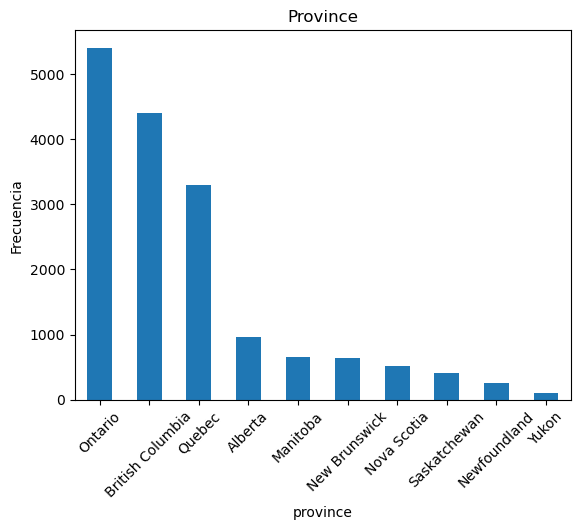


EDUCATION:
education
Bachelor                10475
College                  4238
High School or Below      782
Doctor                    734
Master                    508
Name: count, dtype: int64
Top: 10475 (62.6%)


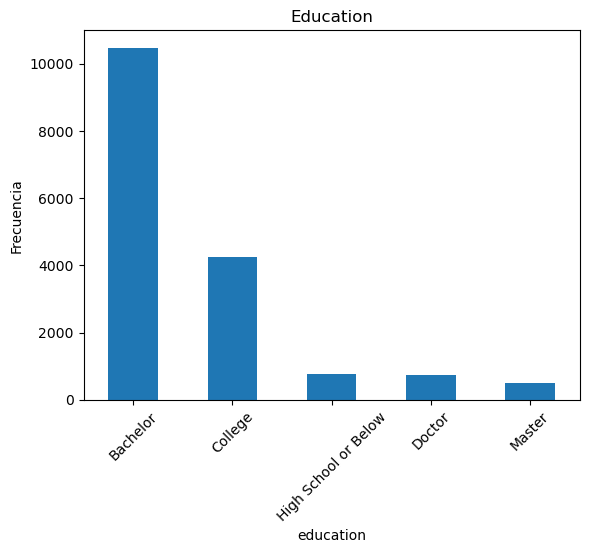


MARITAL STATUS:
marital status
Married     9735
Single      4484
Divorced    2518
Name: count, dtype: int64
Top: 9735 (58.2%)


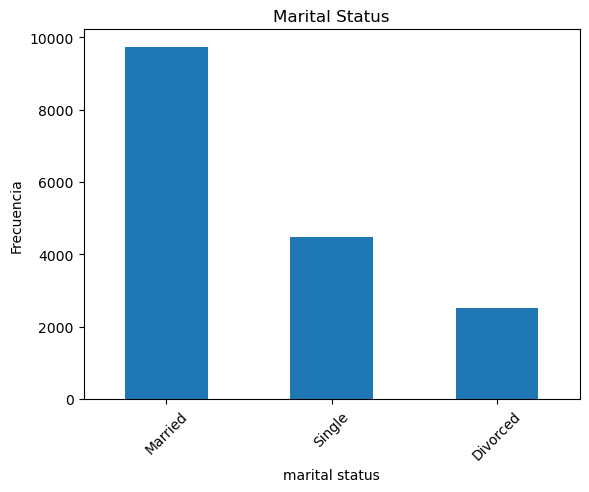


LOYALTY CARD:
loyalty card
Star      7637
Nova      5671
Aurora    3429
Name: count, dtype: int64
Top: 7637 (45.6%)


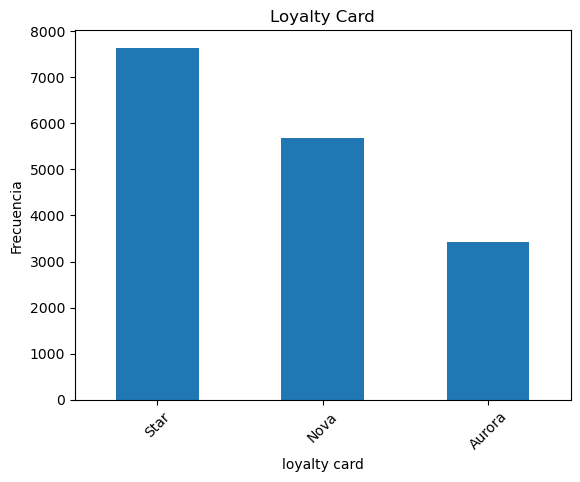


GENDER:
gender
Female    8410
Male      8327
Name: count, dtype: int64
Top: 8410 (50.2%)


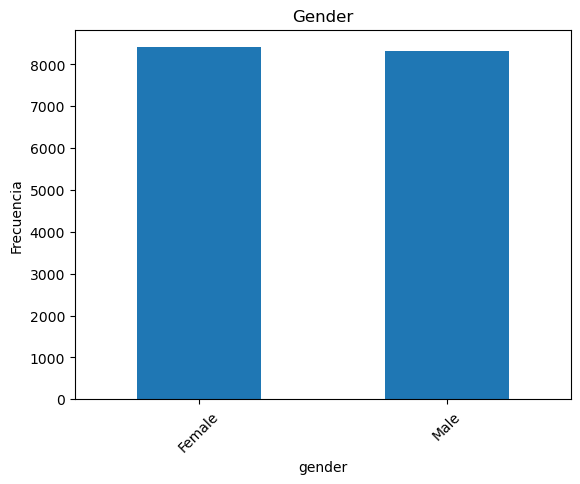


YEAR:
year
2017    202812
2018    202812
Name: count, dtype: int64


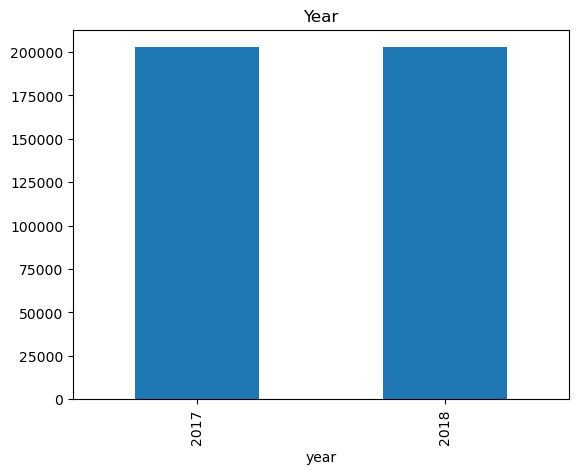


MONTH:
month
1     33802
2     33802
3     33802
4     33802
5     33802
6     33802
7     33802
8     33802
9     33802
10    33802
11    33802
12    33802
Name: count, dtype: int64


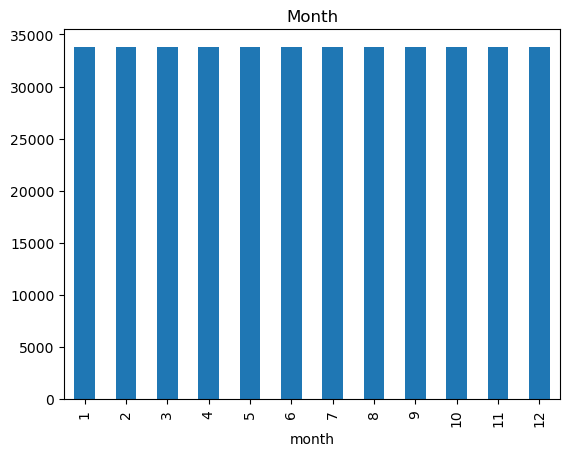


RESUMEN:
         Variable   Top_Cat      Freq      %
0        province   Ontario    5404.0  32.3%
1       education  Bachelor   10475.0  62.6%
2  marital status   Married    9735.0  58.2%
3    loyalty card      Star    7637.0  45.6%
4          gender    Female    8410.0  50.2%
5            year      2017  202812.0  50.0%
6           month         1   33802.0   8.3%


In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar datasets limpios (ajusta nombres)
df_flights = pd.read_csv('customer_flight_activity_clean.csv')  # Tu versión limpia
df_loyalty = pd.read_csv('customer_loyalty_history_clean.csv')  # Tu versión limpia

# === 1. FRECUENCIAS LOYALTY ===
cat_loyalty = ['province', 'education', 'marital status', 'loyalty card', 'gender']
print("LOYALTY CATEGÓRICAS:")
for var in cat_loyalty:
    print(f"\n{var.upper()}:")
    freq = df_loyalty[var].value_counts()
    print(freq)
    print(f"Top: {freq.iloc[0]} ({freq.iloc[0]/len(df_loyalty)*100:.1f}%)")
    # Gráfico
    freq.head(10).plot(kind='bar', title=var.title())
    plt.ylabel('Frecuencia')
    plt.xticks(rotation=45)
    plt.show()

# === 2. FRECUENCIAS FLIGHTS ===
cat_flights = ['year', 'month']  # Si están separadas
for var in cat_flights:
    if var in df_flights.columns:
        print(f"\n{var.upper()}:")
        freq = df_flights[var].value_counts().sort_index()
        print(freq)
        freq.plot(kind='bar', title=var.title())
        plt.show()

# === 3. TABLA RESUMEN ===
summary = pd.DataFrame({
    'Variable': [],
    'Top_Cat': [],
    'Freq': [],
    '%': []
})
for df_name, cats in [('Loyalty', cat_loyalty), ('Flights', cat_flights)]:
    for var in cats:
        if df_name == 'Loyalty' and var in df_loyalty.columns:
            top = df_loyalty[var].value_counts().iloc[0]
            pct = top / len(df_loyalty) * 100
        elif df_name == 'Flights' and var in df_flights.columns:
            top = df_flights[var].value_counts().iloc[0]
            pct = top / len(df_flights) * 100
        else:
            continue
        summary = pd.concat([summary, pd.DataFrame({
            'Variable': [var],
            'Top_Cat': [df_loyalty[var].value_counts().index[0] if df_name=='Loyalty' else df_flights[var].value_counts().index[0]],
            'Freq': [top],
            '%': [f'{pct:.1f}%']
        })], ignore_index=True)

print("\nRESUMEN:")
print(summary)
summary.to_csv('frecuencias_categoricas.csv', index=False)


## Fase 3: Visualización 

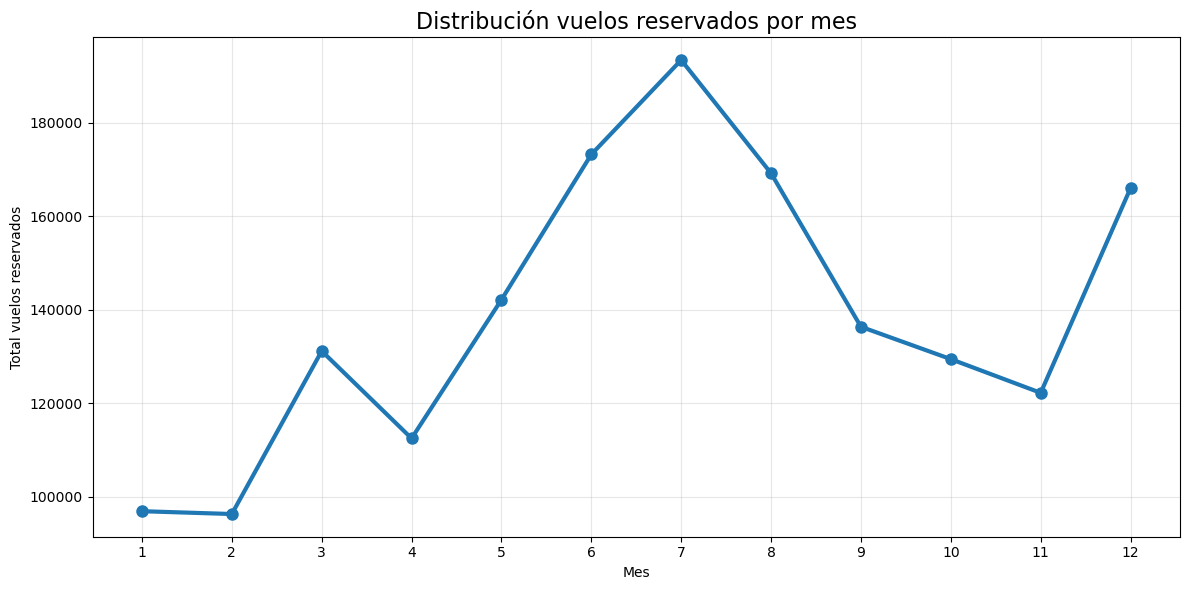

In [33]:
#Pregunta 1: VUELOS RESERVADOS POR MES
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_flights = pd.read_csv('customer_flight_activity_clean.csv') 

plt.figure(figsize=(12,6))
vuelos_mes = df_flights.groupby('month')['flights booked'].sum()
plt.plot(vuelos_mes.index, vuelos_mes.values, marker='o', linewidth=3, markersize=8)
plt.title('Distribución vuelos reservados por mes', fontsize=16)
plt.xlabel('Mes')
plt.ylabel('Total vuelos reservados')
plt.xticks(range(1,13))
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('pregunta1_vuelos_mes.png', dpi=300)
plt.show()


**Interpretación de resultados**:
Observamos como el gráfico sigue una línea normalmente ascendente. Comienza en Enero con un valor bajo, y va aumentando progresivamente hasta alcanzar su punto máximo en Julio, aunuque con ciertas oscilaciones negativas en el mes de abril. A partir de julio, se observa una ligera disminución en Agosto, que seguirá en disminución progresiva hasta Noviembre. Por último, en Noviembre comienza a crecer en gran medida, situando Diciembre en un lugar alto, cercano al máximo del año.

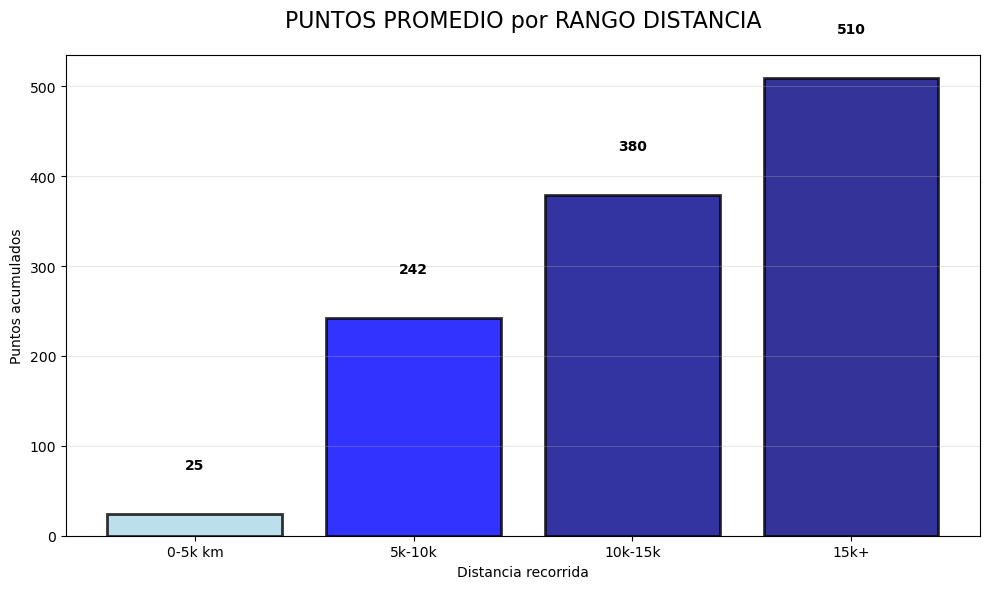

In [40]:
# Pregunta 2: DISTANCIA vs PUNTOS (PUNTOS + LÍNEA)
df_flights = pd.read_csv('customer_flight_activity_clean.csv')

# 4 bins simples
df_flights['dist_bin'] = pd.cut(df_flights['distance'], bins=4, labels=['0-5k km', '5k-10k', '10k-15k', '15k+'])
puntos_bin = df_flights.groupby('dist_bin')['points accumulated'].mean()

plt.figure(figsize=(10,6))
plt.bar(puntos_bin.index, puntos_bin.values, color=['lightblue', 'blue', 'darkblue', 'navy'], 
        alpha=0.8, edgecolor='black', linewidth=2)
plt.title('PUNTOS PROMEDIO por RANGO DISTANCIA', fontsize=16, pad=20)
plt.ylabel('Puntos acumulados')
plt.xlabel('Distancia recorrida')
for i, v in enumerate(puntos_bin.values):
    plt.text(i, v+50, f'{v:.0f}', ha='center', fontweight='bold')

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('pregunta2_simple.png', dpi=300)
plt.show()


En esta ocasión, observamos como en la distancia inicial reccorrida los puntos acumulados son casi nulos, aumentando significativamente a medida que la distancia recorrida crece. Esto indica que los **puntos acumulados están directamente relacionados con la distancia** recorrida, siendo mayor la acumulación de puntos a mayor distancia.

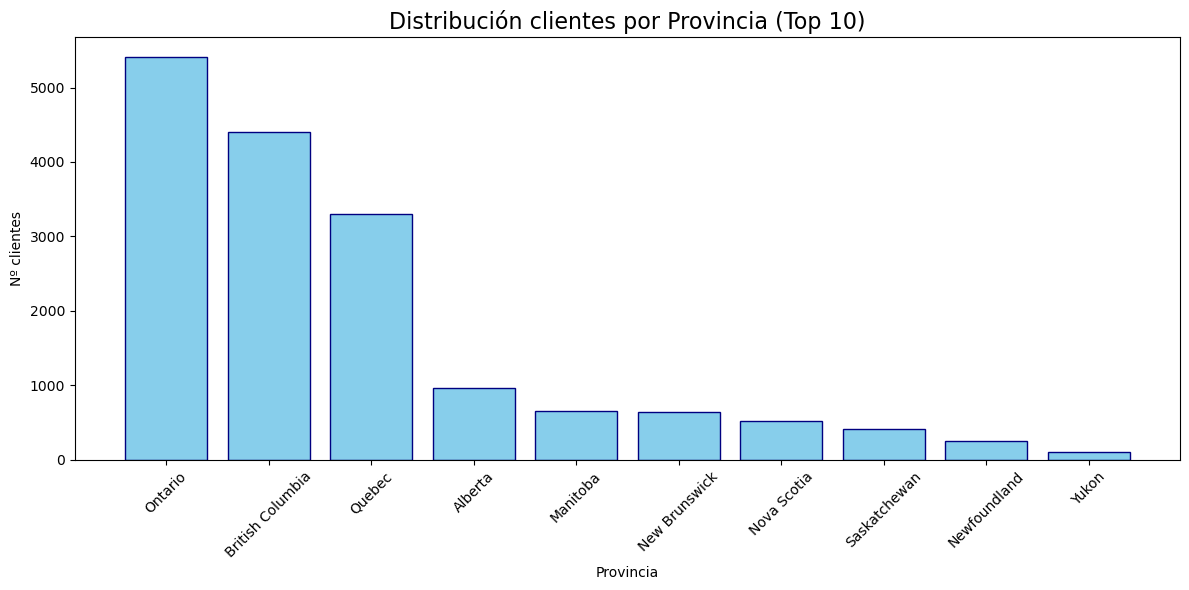

In [41]:
# Pregunta 3: DISTRIBUCIÓN CLIENTES POR PROVINCIA
df_loyalty = pd.read_csv('customer_loyalty_history_clean.csv')
plt.figure(figsize=(12,6))
prov_freq = df_loyalty['province'].value_counts().head(10)
plt.bar(prov_freq.index, prov_freq.values, color='skyblue', edgecolor='navy')
plt.title('Distribución clientes por Provincia (Top 10)', fontsize=16)
plt.xlabel('Provincia')
plt.ylabel('Nº clientes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('pregunta3_provincia.png', dpi=300)
plt.show()


Analizando el número de clientes por provincia, podemos observar que las provincias con mayor número de clientes son **Ontario, British Columbia y Quebec**. Estas provincias presentan una mayor concentración de clientes en comparación con otras regiones, lo que podría estar relacionado con factores demográficos, económicos o de infraestructura que favorecen la presencia de clientes en estas áreas específicas. Además, es muy significativo el contraste entre estas provincias y aquellas con menor número de clientes, lo que resalta la **disparidad** en la distribución geográfica de la base de clientes.

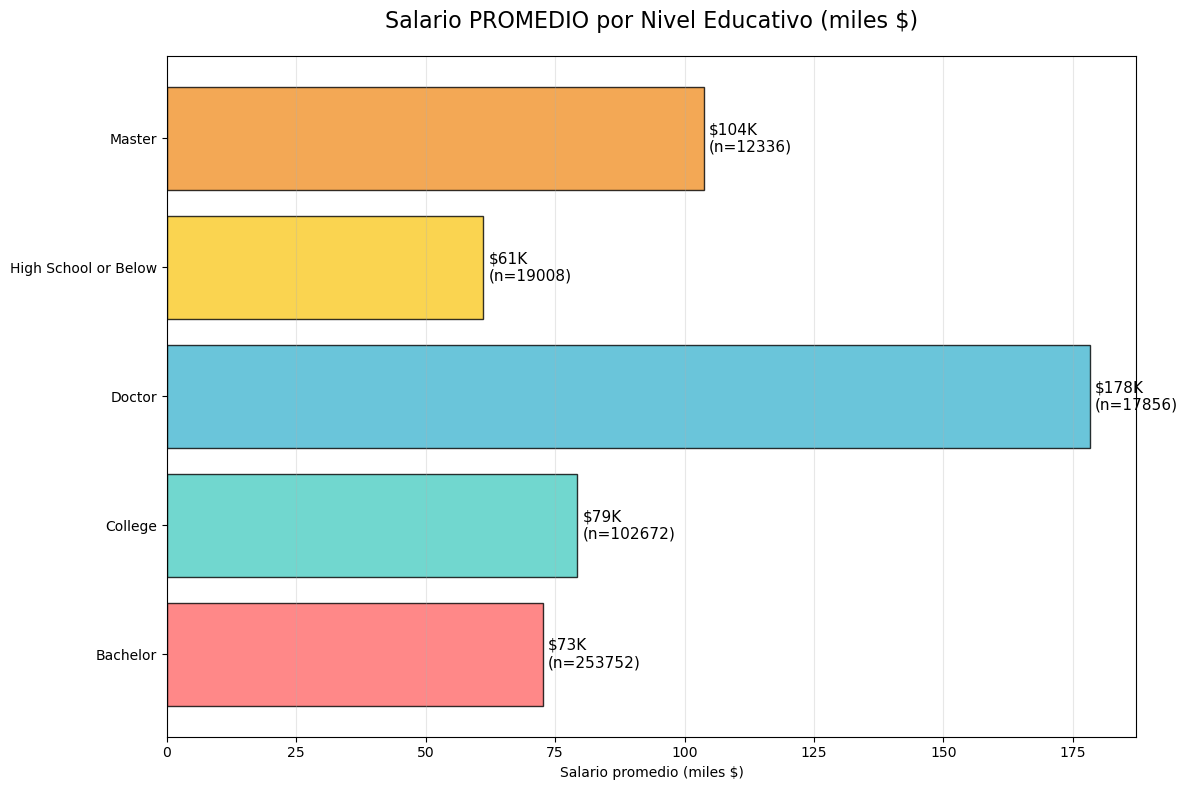

In [34]:
# Pregunta 4: SALARIO PROMEDIO por EDUCACIÓN
df = pd.read_csv('data/df_merged_clean.csv')

# Calcular medias + barras horizontales con confianza
edu_salario = df.groupby('education')['salary'].agg(['mean', 'count']).reset_index()
edu_salario['mean'] = edu_salario['mean']/1000  # Miles para legibilidad

plt.figure(figsize=(12,8))
bars = plt.barh(edu_salario['education'], edu_salario['mean'], 
                color=['#ff6b6b', '#4ecdc4', '#45b7d1', '#f9ca24', '#f0932b'],
                alpha=0.8, edgecolor='black')

# Etiquetas en barras
for i, bar in enumerate(bars):
    width = bar.get_width()
    plt.text(width + 1, bar.get_y() + bar.get_height()/2, 
             f'${width:.0f}K\n(n={edu_salario["count"][i]})',
             va='center', fontsize=11)

plt.title('Salario PROMEDIO por Nivel Educativo (miles $)', fontsize=16, pad=20)
plt.xlabel('Salario promedio (miles $)')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.savefig('pregunta4_salario_visual.png', dpi=300)
plt.show()


Como podemos apreciar, los **salarios promedio tienden a aumentar con el nivel educativo**. Los individuos con educación "Master" tienen un salario promedio más alto en comparación con aquellos con educación "Bachelor". Siendo el salario de Doctor el más elevado de todos. Esto sugiere que un mayor nivel educativo está asociado con mejores oportunidades salariales. Además, la diferencia en salarios entre los niveles educativos es notable, lo que resalta la importancia de la educación en el ámbito laboral y económico. Cabe destacar que el **College** ha sido imputado con la media del Salary global para evitar nulos en el análisis.

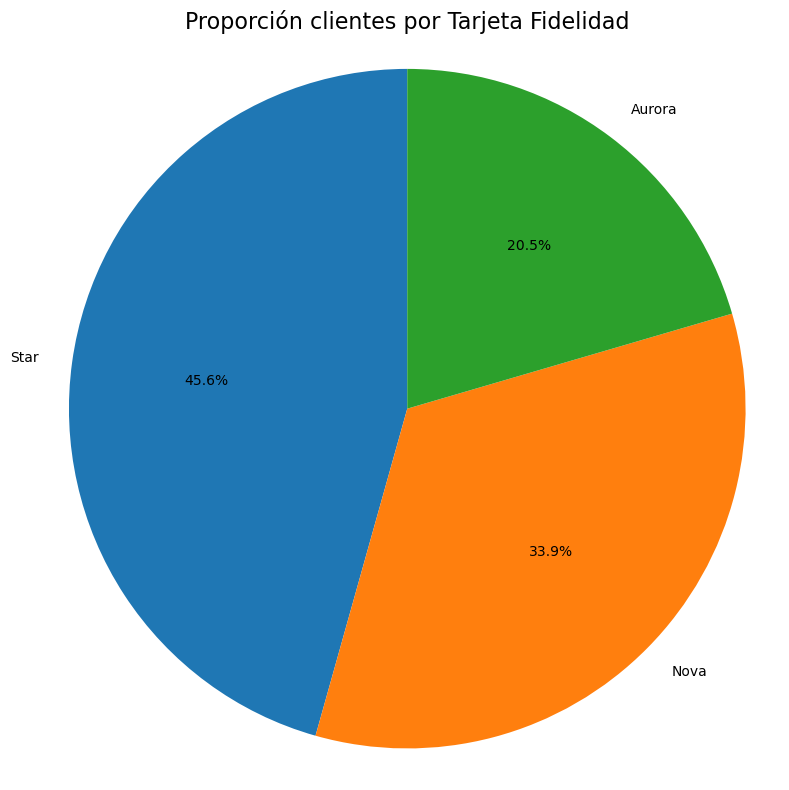

In [ ]:
# Pregunta 5: PROPORCIÓN CLIENTES POR TARJETAS FIDELIDAD
plt.figure(figsize=(8,8))
tarjeta_prop = df_loyalty['loyalty card'].value_counts()
plt.pie(tarjeta_prop.values, labels=tarjeta_prop.index, autopct='%1.1f%%', startangle=90)
plt.title('Proporción clientes por Tarjeta Fidelidad', fontsize=16)
plt.axis('equal')
plt.tight_layout()
plt.savefig('pregunta5_tarjetas.png', dpi=300)
plt.show()


En esta ocasión, observamos cómo la proporción de clientes con tarjeta de fidelidad **"Star"** es significativamente mayor **(casi un 50%)** con respecto a otras tarjetas como "Nova" o "Aurora". Esto indica que la tarjeta "Star" es la más popular entre los clientes, lo que podría deberse a beneficios específicos, promociones o una mayor aceptación en el mercado. 

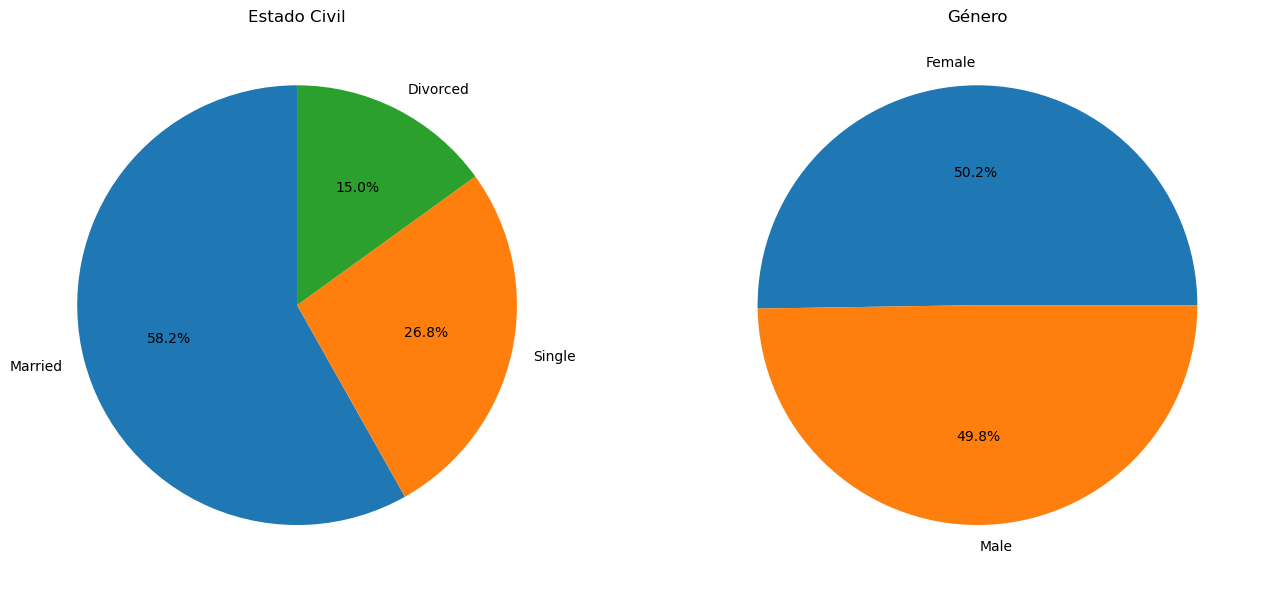

In [ ]:
# Pregunta 6: DISTRIBUCIÓN ESTADO CIVIL + GÉNERO
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,6))

# Estado civil
estado = df_loyalty['marital status'].value_counts()
ax1.pie(estado.values, labels=estado.index, autopct='%1.1f%%', startangle=90)
ax1.set_title('Estado Civil')

# Género
genero = df_loyalty['gender'].value_counts()
ax2.pie(genero.values, labels=genero.index, autopct='%1.1f%%')
ax2.set_title('Género')

plt.tight_layout()
plt.savefig('pregunta6_civil_genero.png', dpi=300)
plt.show()


En esta ocasión, observamos que la mayoría de los clientes están casados, representando aproximadamente un **60%** del total. Esto sugiere que el estado civil de los clientes tiende a ser predominantemente **casado**, lo que podría influir en sus patrones de consumo y comportamiento de compra. La proporción de clientes solteros es significativamente menor, representando alrededor de un 30%, mientras que los clientes divorciados constituyen la menor proporción, con aproximadamente un 15%. Esta distribución del estado civil puede tener implicaciones importantes para las estrategias de marketing y segmentación de clientes.

# Fase 4: Evaluación de diferencias en Reservas de vuelos por Nivel Educativo

In [37]:
# Filtramos las columnas relevantes
df_fase4 = df[['flights booked', 'education']]
# Agrupamos por nivel educativo y calculamos estadísticas
analisis_descriptivo = df_fase4.groupby('education')['flights booked'].agg(['mean', 'std', 'count', 'median'])
print(analisis_descriptivo)

                          mean       std   count  median
education                                               
Bachelor              4.091093  5.216995  253752     1.0
College               4.153012  5.242136  102672     1.0
Doctor                4.146281  5.250093   17856     1.0
High School or Below  4.155777  5.234551   19008     1.0
Master                4.184014  5.210294   12336     1.0


In [38]:
from scipy import stats

# Ejemplo de Kruskal-Wallis
grupos = [group['flights booked'].values for name, group in df_fase4.groupby('education')]
stat, p_value = stats.kruskal(*grupos)

print(f"P-valor: {p_value}")
# Si p_value < 0.05, hay diferencias significativas entre los niveles educativos.

P-valor: 0.0012393337284342227


Podemos concluir que no hay evidencias significativas entre los niveles educativos, ya que el valor p es menor a 0.05, lo que indica que no se rechaza la hipótesis nula. Por lo tanto, **no se observan diferencias estadísticamente significativas** en el número de vuelos reservados entre los diferentes niveles educativos en este análisis.

## Demostración gráfica 

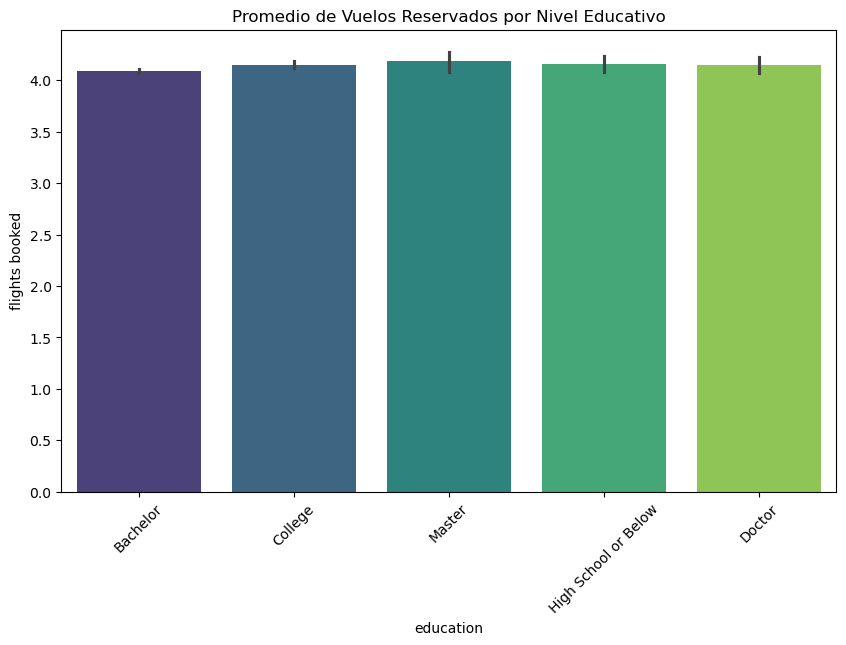

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(data=df_fase4, x='education', y='flights booked', palette='viridis')
plt.title('Promedio de Vuelos Reservados por Nivel Educativo')
plt.xticks(rotation=45)
plt.show()